Импортируем библиотеки и через ссылку создаем dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
dataframe = pd.read_csv(url, sep=',')
dataframe

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


Выписываем первые строки датасета

In [2]:
dataframe.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Выписываем информацию о столбцах и типах.
Здесь можем увидеть количество ненулевых значений, что помогает найти дыры в датасете

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Применение базовых методов описательной статистики

In [4]:
dataframe.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Подсчет доли пропусков в каждом столбце

In [5]:
dataframe.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Проверим наличие дублирующих строк

In [6]:
df_dup = dataframe.duplicated()
df_dup

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [7]:
sum(df_dup) #количество дубликатов

1

In [8]:
print(dataframe[df_dup]) #дублирующие строки

    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


Исследуем датасет на подозрительные записи

In [9]:
checklist = {}
checklist["Duplicates"] = dataframe[dataframe.duplicated()].index.values
checklist["Invalid_age"] = dataframe[((dataframe["age"] > 110) | (dataframe["age"] < 18) | dataframe["age"].isna())].index.values
checklist["Invalid_purchases"] = dataframe[(dataframe["purchases"] <= 0) | (dataframe["purchases"] > 500)].index.values
checklist["Invalid_revenue"] = dataframe[(dataframe["revenue"] <= 0) | (dataframe["revenue"] > 100000)].index.values
checklist["Invalid_country"] = dataframe[dataframe["country"].isna()].index.values
report = pd.Series(checklist, name = "n_bad_rows")
report

Duplicates                      [40]
Invalid_age           [4, 5, 12, 20]
Invalid_purchases     [5, 6, 17, 33]
Invalid_revenue      [6, 10, 17, 33]
Invalid_country                   []
Name: n_bad_rows, dtype: object

В ходе исследования обнаружили:
 - невалидные значения возраста (больше 110 лет и меньше 18)
 - невалидные значения количества покупок (нулевые, отрицательные или больше 500)
 - невалидные значения дохода (нулевые, отрицательные или больше 100000)
 - дубликаты записей (1 запись)
 - столбец стран не содержит пропущенных значений
Также получили конкретные номера строк с невалидными данными по каждому атрибуту

## Базовый EDA

**Сначала избавимся от невалидных строк**

Создадим массив с номерами строк из проверки

In [10]:
ind_report = report.index.values
rows_to_del = np.array([], dtype=int) #создаем пустой массив
#проходимся по всем индексам
for ind in ind_report:
    rows_to_del = np.concatenate([rows_to_del,report[ind]]) #объединяем индексы по всем атрибутам
rows_to_del = np.unique(rows_to_del) # убираем дубликаты
rows_to_del

array([ 4,  5,  6, 10, 12, 17, 20, 33, 40])

**Удалим эти строки из фрейма**

In [11]:
dataProcessed = dataframe.drop(rows_to_del)
dataProcessed = dataProcessed.reset_index(drop=True) # обновляем номера строк
dataProcessed

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,8,28.0,CN,2,456
5,9,39.0,US,4,980
6,10,24.0,RU,7,511
7,12,20.0,CN,7,1652
8,14,36.0,DE,9,2358
9,15,57.0,FR,7,693


Мы получили очищенные данные, с которыми можно работать

Подсчет частоты для категориальной переменной (страна)

In [12]:
dataProcessed["country"].value_counts()

country
FR    10
RU     9
US     6
DE     5
CN     2
Name: count, dtype: int64

Группировка

In [13]:
group = dataProcessed.groupby("country")
group.size() #количество строк в каждой группе

country
CN     2
DE     5
FR    10
RU     9
US     6
dtype: int64

In [14]:
group.count() #число раз, когда значение группы встречалось в каждом столбце

,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,5,5,5,5
FR,10,10,10,10
RU,9,9,9,9
US,6,6,6,6


In [15]:
group["revenue"].median() # медианный доход в каждой стране 

country
CN    1054.0
DE    1104.0
FR     619.5
RU     654.0
US     636.5
Name: revenue, dtype: float64

In [16]:
group["revenue"].max() # максимальный доход в каждой стране

country
CN    1652
DE    2475
FR    1608
RU    2086
US     980
Name: revenue, dtype: int64

In [17]:
group.get_group('RU') # рассмотрим отдельную группу

,user_id,age,country,purchases,revenue
1,2,24.0,RU,5,1115
3,4,31.0,RU,6,654
6,10,24.0,RU,7,511
12,19,47.0,RU,3,432
13,20,31.0,RU,2,442
17,25,21.0,RU,5,650
19,27,54.0,RU,6,1302
24,32,26.0,RU,6,1080
31,40,34.0,RU,7,2086


Сгруппируем данные по возрасту на три категории: молодежь, взрослые, пожилые

In [18]:
df_age_cat=dataProcessed #чтобы не испортить фрейм, создадим его копию
cuted_by_age = pd.cut(df_age_cat["age"],3,labels=["Young","Adult","Old"],include_lowest=True) #разбиваем на интервалы
cuted_by_age 

0     Young
1     Young
2       Old
3     Young
4     Young
5     Adult
6     Young
7     Young
8     Adult
9       Old
10    Young
11    Adult
12      Old
13    Young
14    Adult
15    Adult
16    Adult
17    Young
18    Adult
19      Old
20    Adult
21      Old
22      Old
23      Old
24    Young
25    Young
26      Old
27      Old
28    Young
29    Adult
30    Adult
31    Adult
Name: age, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Old']

In [19]:
dataProcessed['age_group']=cuted_by_age #добавляем новый столбец с категорией возраста
dataProcessed.head()

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,Young
1,2,24.0,RU,5,1115,Young
2,3,52.0,FR,7,399,Old
3,4,31.0,RU,6,654,Young
4,8,28.0,CN,2,456,Young


In [20]:
group_by_age = dataProcessed.groupby("age_group") #группируем по категории
print(group_by_age.size())
print(group_by_age['revenue'].mean()) #получим средний заработок по каждому возрасту

age_group
Young    12
Adult    11
Old       9
dtype: int64
age_group
Young     753.416667
Adult    1274.090909
Old       650.666667
Name: revenue, dtype: float64


C:\Users\EcoRestart\AppData\Local\Temp\ipykernel_18712\171845721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_age = dataProcessed.groupby("age_group") #группируем по категории



Попробуем получить средний заработок в каждой стране в категории "Взрослые"


In [21]:
groupp = group_by_age.get_group("Adult").groupby('country') #создаем новую группу по странам в категории Молодежь
for country in group_by_age.get_group("Adult")["country"].unique(): # по каждой стране выводим ее средний заработок
    print(country, " ", groupp.get_group(country)["revenue"].mean())

US   760.5
DE   1857.0
FR   1105.3333333333333
RU   2086.0


Сделаем выводы:
- Провели очистку данных
- В данных преобладает население Франции
- Медианный и максимальный доход в Германии выше, чем в других странах
- В данных больше всего молодого населения
- Взрослые люди зарабатывают больше, чем молодые и пожилые
- Средний заработок взрослых людей в России выше чем в других странах

## Визуализация данных, Matplotlib

Stackplot

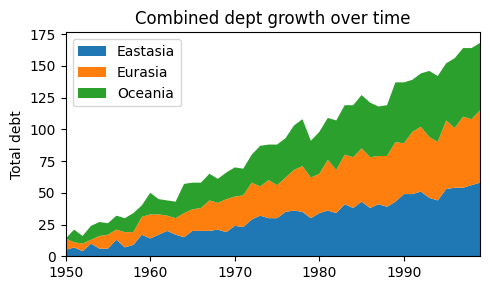

In [22]:
import numpy as np #
import matplotlib.pyplot as plt #

# задаем данные
rng = np.arange(50) #
rnd = np.random.randint(0, 10, size=(3, rng.size)) #
yrs = 1950 + rng #

fig, ax = plt.subplots(figsize=(5, 3)) # создаем полотно заданного размера
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania']) # рисуем линии графиков, указав данные по оси х,оси у и названия графиков (метки)
ax.set_title('Combined dept growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0],xmax = yrs[-1])
fig.tight_layout()
plt.show()

### Scatter, Hist

Несколько графиков на одном полотне

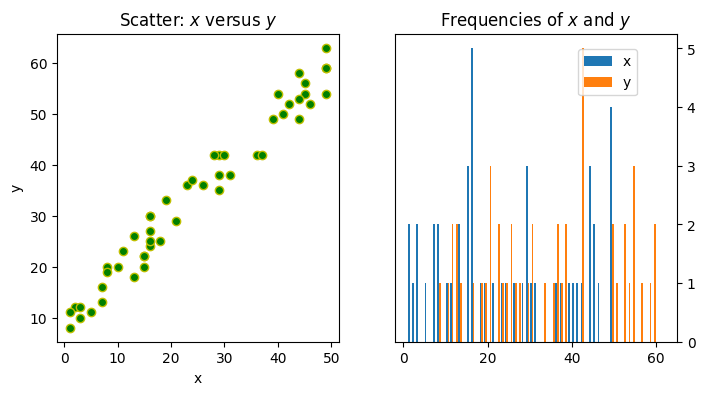

In [23]:
# задаем значения x и y
x = np.random.randint(low = 1, high = 50, size = 50)
y = x + np.random.randint(5, 15, size = x.size)
# data для гистограммы
data = np.column_stack((x,y))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(8,4)) # создаем полотно с двумя графиками

ax1.scatter(x=x,y=y,marker ='o',c='g',edgecolor='y') # график рассеивания
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_ylabel('y')
ax1.set_xlabel('x')

ax2.hist(data, bins=np.arange(data.min(), data.max()),label = ('x','y')) # график гистограммы
ax2.legend(loc=(0.65,0.8))
ax2.set_title("Frequencies of $x$ and $y$")
ax2.yaxis.tick_right()
plt.show()

Возьмем данные по питательному составу некоторых продуктов, которые люди чаще всего употребляют. Данные взяты из Министерства сельского хозяйства США FoodData Central API.
По этим данным определим:
 - какие значения питательных свойств встречаются чаще всего (**гистограммы**)
 - существует ли корреляция между питательными свойствами продуктов (**график попарных зависимостей, тепловая карта**)
 - распределение калорий по категориям (**ящик с усами**)

In [24]:
import pandas as pd
path = r"D:\aie_repo\rusmina-ai-system\homeworks\HW02\HW02-dataset.csv"
# Получили датасет, очистили от пустых значений
df = pd.read_csv(path, na_values='.').dropna() 
df.head()

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9


In [25]:
df.info() #  Получаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food_name  200 non-null    object 
 1   category   200 non-null    object 
 2   calories   200 non-null    float64
 3   protein    200 non-null    float64
 4   carbs      200 non-null    float64
 5   fat        200 non-null    float64
 6   iron       200 non-null    float64
 7   vitamin_c  200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.1+ KB


Как видим, преобразовывать данные к типам не нужно.

Избавимся от столбца **"food_name"**, так как он не содержит никаких полезных данных.

In [26]:
df_work = df.iloc[:,1:] # Берем все столбцы, кроме первого
df_work.head()

,category,calories,protein,carbs,fat,iron,vitamin_c
0,Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,Apples,113.0,0.32,22.70,3.08,0.19,3.9


1) Построим гистограммы для каждого целочисленного столбца (для каждого питательного свойства)

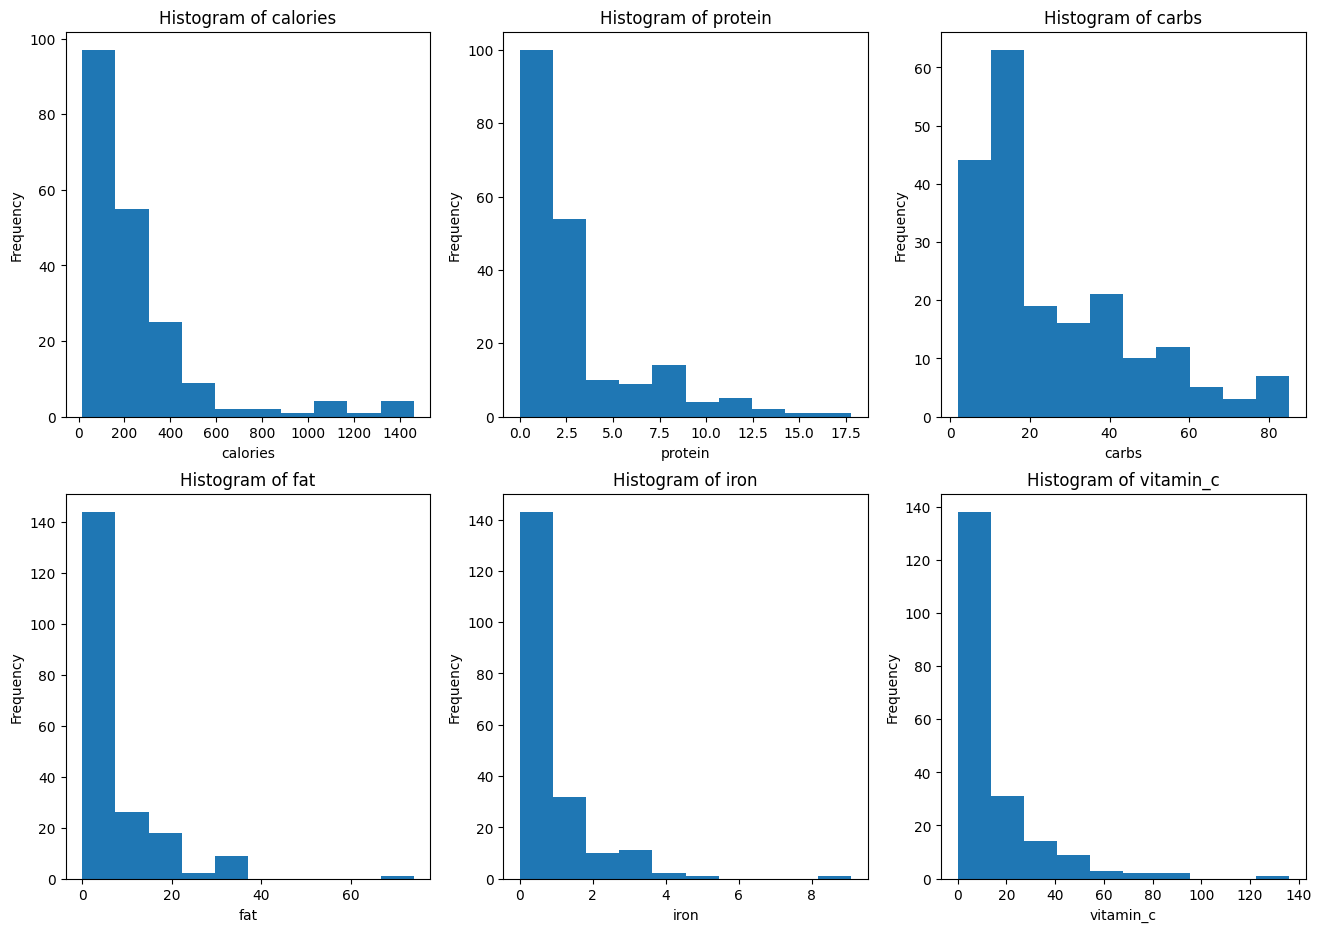

In [27]:
columns = ['calories','protein','carbs','fat','iron','vitamin_c'] # зададим необходимые целочисленные столбцы
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,11)) # создадим 6 графиков, где 2 ряда и 3 столбца
axes = axes.flatten() # из матрицы в одномерный массив
# с помощью цикла создадим 6 гистограмм
for i in range(6): 
    axes[i].hist(df_work[columns[i]])
    axes[i].set_title(f'Histogram of {columns[i]}')
    axes[i].set_xlabel(columns[i])
    axes[i].set_ylabel('Frequency')
fig.savefig(r'D:\aie_repo\rusmina-ai-system\homeworks\HW02\figures\histogram.png') # сохраняем
plt.show()

Исходя из построенных графиком можно сделать вывод о содержании питательных свойств в различных продуктах

2) Построим тепловую карту для поиска корреляции между свойствами

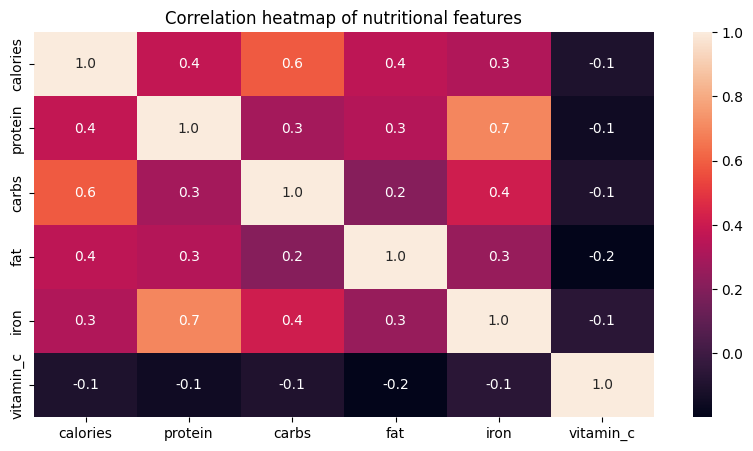

In [28]:
import seaborn as sns # импортируем библиотеку
corr_df = df.iloc[:,2:].corr() # высчитываем корреляцию между свойствами по формуле Пирсона (метод .corr())

fig = plt.figure(figsize=(10,5)) # создаем полотно
sns.heatmap(corr_df, annot=True, fmt=".1f") # построим тепловую карту
plt.title("Correlation heatmap of nutritional features")
fig.savefig(r'D:\aie_repo\rusmina-ai-system\homeworks\HW02\figures\heatmap.png') # сохраним график в папку
plt.show()

Исходя из тепловой карты можем сделать выводы:
- Относительно высокая связь между калориями и содержанием жиров (*Продукты с большим количеством углеводов чаще всего калорийны*)
- Высокая связь между железом и белком (*Продукты содержащие белок богаты железом*)
- Отрицательная связь между содержанием жиров и витамином С (*Продукты с большим количеством углеводов бедны витамином С*)
- Между остальными показателями и витамином С нет связи

Теперь построим график попарных зависимостей

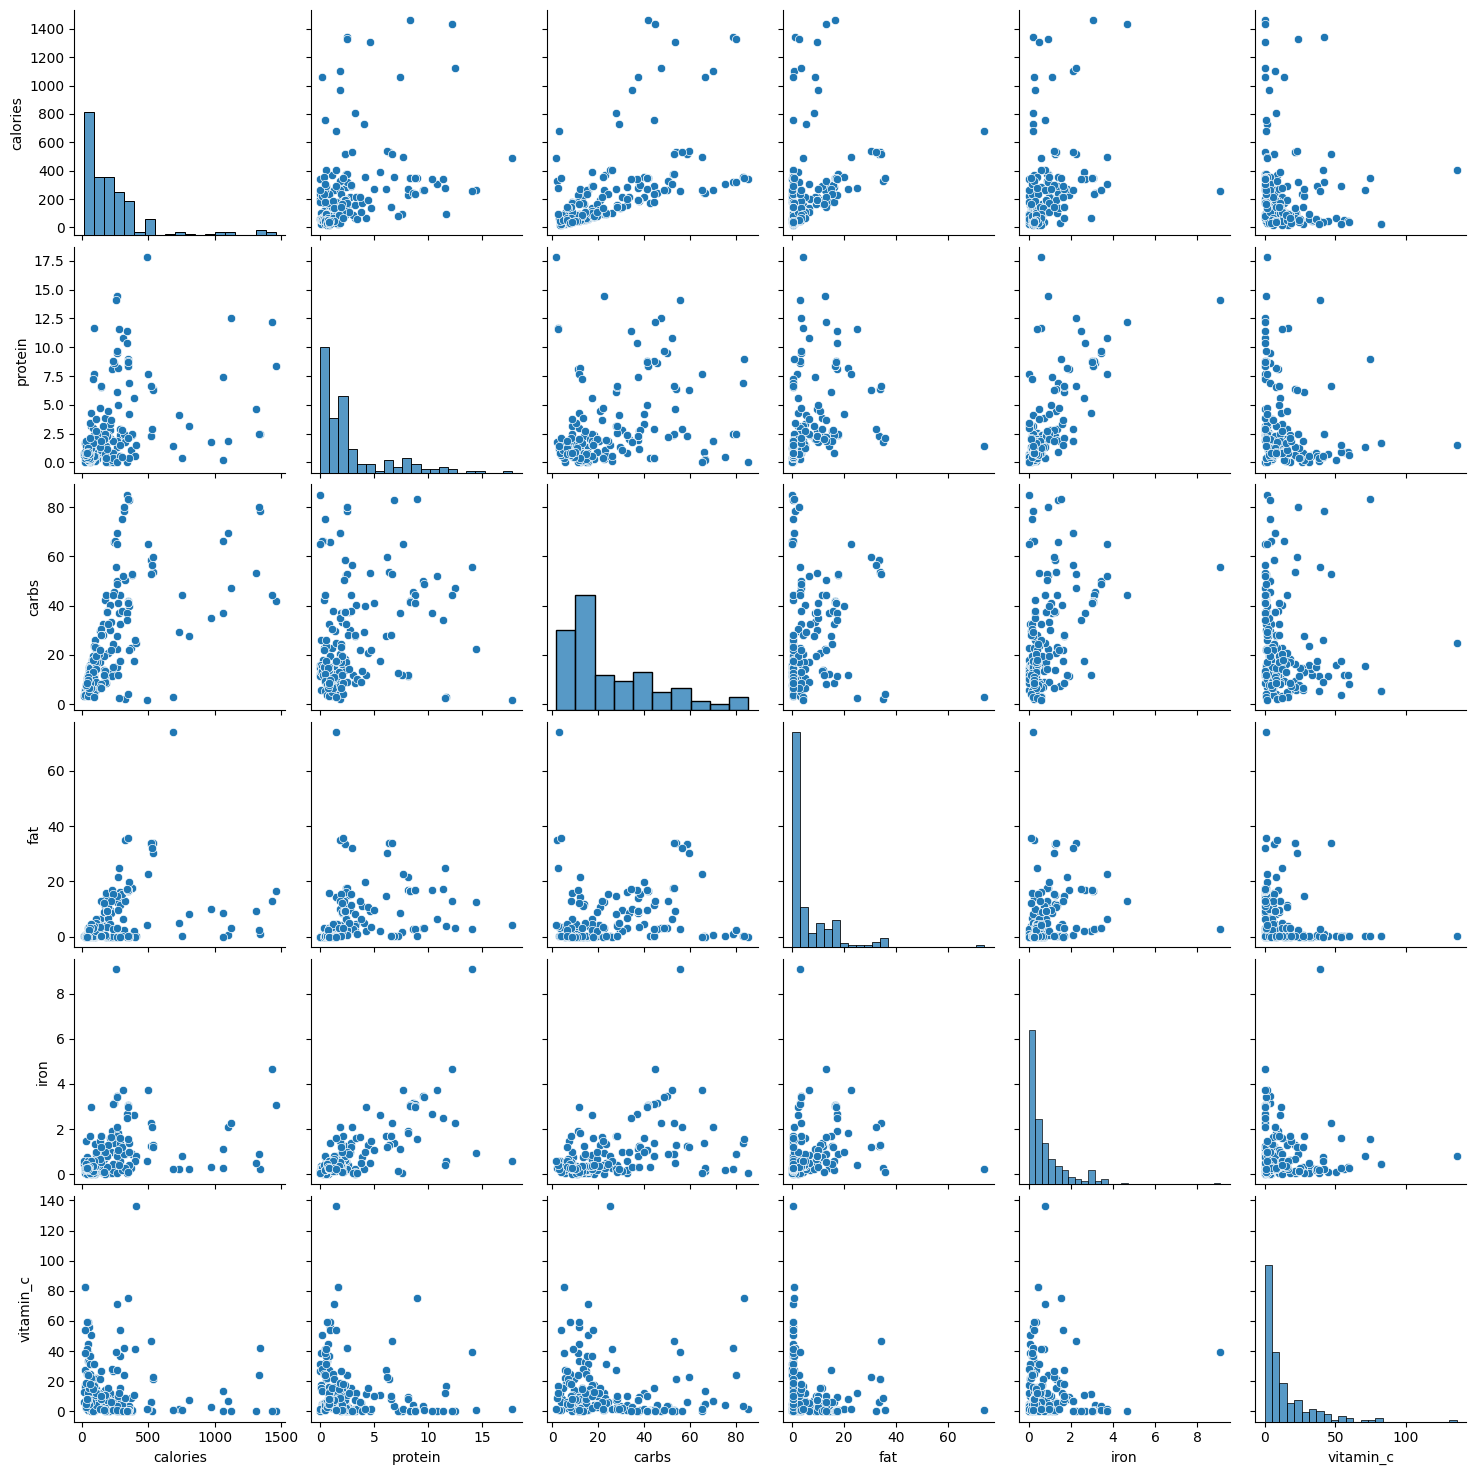

In [29]:
sns_plot = sns.pairplot(df[columns]) # зададим соответствующие колонки
sns_plot.savefig(r'D:\aie_repo\rusmina-ai-system\homeworks\HW02\figures\pairplot.png') # сохраним в директорию
plt.show()

3) Распределение питательных свойств по категориям

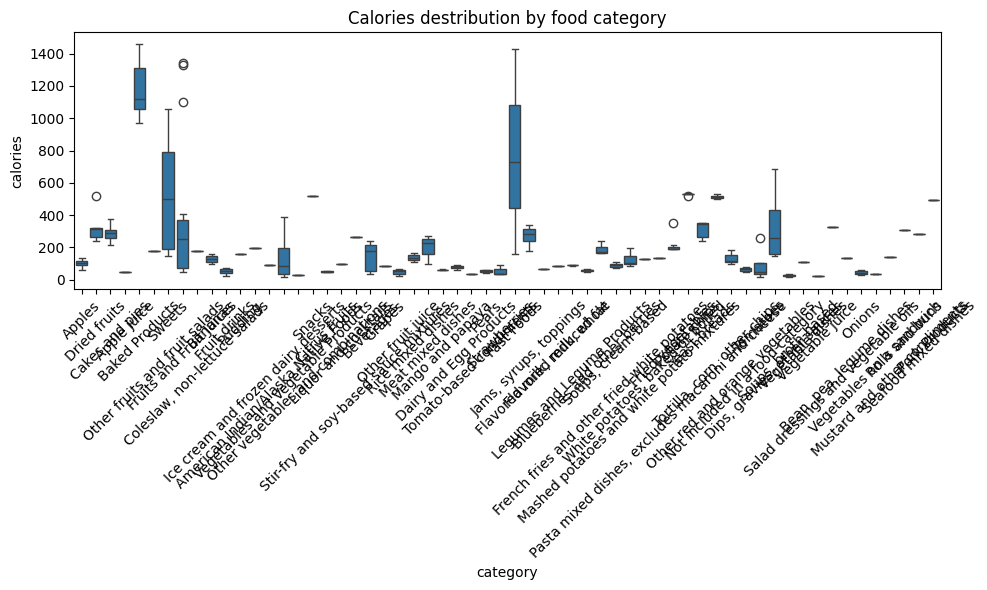

In [30]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df_work,y="calories",x="category") # строим ящик с усами
plt.title("Calories destribution by food category")
plt.xticks(rotation=45) # поворачиваем значения на оси x, чтобы было читабельно
plt.tight_layout() # автоматически задаем расстояния между названиями на оси х, чтобы не перекрывались
fig.savefig(r'D:\aie_repo\rusmina-ai-system\homeworks\HW02\figures\boxplot.png')
plt.show()